In [1]:
import pandas as pd 

In [2]:
df= pd.read_csv('new_data.csv')

In [3]:
df.head()

,Unnamed: 0,review,sentiment
0,0,"['one', 'of', 'the', 'other', 'reviewer', 'ha'...",positive
1,1,"['a', 'wonderful', 'little', 'production', 'th...",positive
2,2,"['i', 'thought', 'this', 'wa', 'a', 'wonderful...",positive
3,3,"['basically', 'there', 'a', 'family', 'where',...",negative
4,4,"['petter', 'matteis', 'love', 'in', 'the', 'ti...",positive


In [4]:
df=df.drop(columns=['Unnamed: 0'])

In [6]:
import pandas as pd
import ast

df['review'] = df['review'].apply(ast.literal_eval)  # Convert string → list


In [9]:
import gensim 
import nltk
from gensim.models import Word2Vec
nltk.download('punkt_tab')
import warnings

warnings.filterwarnings(action='ignore')
# we just trained a model here
from gensim.models import Word2Vec

model_wv = Word2Vec(sentences=df['review'], vector_size=100, window=10, min_count=1)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\purni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
df.shape

(50000, 2)

In [11]:
model_wv.wv['good']


array([-3.5194077e+00, -1.4615841e+00, -3.2596433e+00,  1.6066468e+00,
        2.7897835e+00, -5.3723788e-01,  1.7010685e+00,  2.4147000e+00,
        2.9890628e+00,  5.6890946e-02,  3.0043092e+00,  1.7785907e-01,
        1.4595858e+00,  1.8439188e+00, -1.1619984e-02, -9.3263716e-01,
       -1.0684959e+00, -6.6318650e+00,  3.2876525e+00,  2.8210425e+00,
        9.7076297e-01,  3.1369598e+00, -2.3207278e+00,  2.7250996e+00,
        1.3242594e+00,  1.1268017e+00, -3.8534811e-01, -5.6609827e-01,
        1.8382945e+00, -2.0173969e+00,  1.9734158e-01, -9.8751771e-01,
       -3.4761131e+00,  2.5516194e-01, -1.8749926e+00,  9.4053008e-02,
       -4.5904863e-01,  4.2090573e+00,  6.4622486e-01, -1.0448427e+00,
       -2.0721245e+00,  1.9995793e+00, -3.1764059e+00,  2.7541986e-01,
        9.0765637e-01,  3.7345145e+00,  1.9283991e+00,  3.4943061e+00,
        1.8541510e+00,  8.9213121e-01, -1.7411609e+00,  4.2538020e-01,
       -1.5575808e+00,  2.8868012e+00, -6.6906589e-01, -4.2426286e+00,
      

In [7]:
review_lengths = df['review'].apply(len)
print("Max length:", review_lengths.max())
print("Average length:", review_lengths.mean())
print("90th percentile length:", review_lengths.quantile(0.9))


Max length: 2450
Average length: 226.33286
90th percentile length: 442.0


In [8]:
print(df['review'].iloc[0])
print(type(df['review'].iloc[0]))


['one', 'of', 'the', 'other', 'reviewer', 'ha', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'oz', 'episode', 'youll', 'be', 'hooked', 'they', 'are', 'right', 'a', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'methe', 'first', 'thing', 'that', 'struck', 'me', 'about', 'oz', 'wa', 'it', 'brutality', 'and', 'unflinching', 'scene', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'go', 'trust', 'me', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'this', 'show', 'pull', 'no', 'punch', 'with', 'regard', 'to', 'drug', 'sex', 'or', 'violence', 'it', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'wordit', 'is', 'called', 'oz', 'a', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'it', 'focus', 'mainly', 'on', 'emerald', 'city', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', 'all', 'the', 'cell', 'have', 'glass', 'front',

In [13]:
def review_to_vectors(tokens, model):
    vectors = []
    for word in tokens:
        if word in model.wv:
            vectors.append(model.wv[word])
    return vectors


In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequences = [review_to_vectors(tokens, model_wv) for tokens in df['review']]
MAX_LEN = 150
padded_sequences = pad_sequences(sequences, maxlen=MAX_LEN, dtype='float32',
                                 padding='post', truncating='post', value=0.0)
print(padded_sequences.shape)  # → (5000, 400, 300)


(50000, 150, 100)


In [16]:
print(padded_sequences.shape)  # → (5000, 400, 300)


(50000, 150, 100)


In [17]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['sentiment']= label_encoder.fit_transform(df['sentiment'])

df['sentiment'].unique()

array([1, 0])

In [18]:
y = df['sentiment'].values 


In [19]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Assume padded_sequences is ready (e.g., shape = (5000, 150, 300))
X = padded_sequences

# Step 2: Labels (make sure this is a numpy array of 0s and 1s)
y = np.array(df['sentiment'])  # or wherever your binary labels are

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Define your LSTM model (based on your previous config)
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(64))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Step 5: Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 6: Summary
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 150, 128)            │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 166,721 (651.25 KB)

 Trainable params: 166,721 (651.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 95s 93ms/step - accuracy: 0.6754 - loss: 0.5933 - val_accuracy: 0.8426 - val_loss: 0.3598
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 92s 92ms/step - accuracy: 0.8400 - loss: 0.3614 - val_accuracy: 0.8574 - val_loss: 0.3276
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 93s 92ms/step - accuracy: 0.8657 - loss: 0.3144 - val_accuracy: 0.8633 - val_loss: 0.3169
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 94s 94ms/step - accuracy: 0.8768 - loss: 0.2893 - val_accuracy: 0.8599 - val_loss: 0.3200
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 97s 97ms/step - accuracy: 0.8902 - loss: 0.2641 - val_accuracy: 0.8650 - val_loss: 0.3037
Test Accuracy: 86.33%


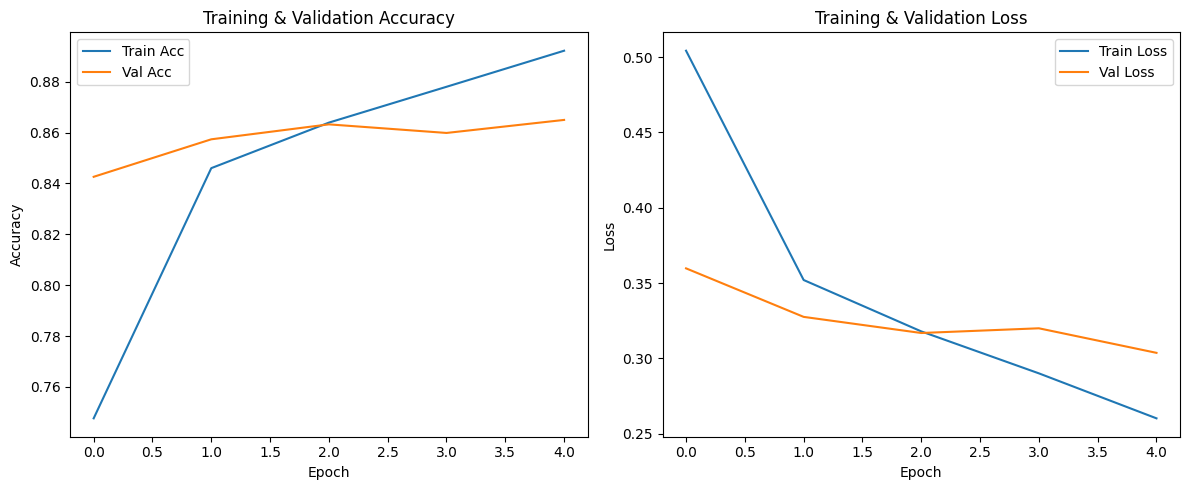

In [25]:
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you already have these:
# padded_sequences → shape (N, 150, 300)
# df['label']      → your binary target (0/1)

X = padded_sequences
y = np.array(df['sentiment'])

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Train the model and save the training history
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% of training data will be used for validation
    epochs=5,
    batch_size=32,
    verbose=1
)
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
